# COP Optimization for a Simple Vapor Recompression Cycle

In [1]:
from vapor_compression import SimpleVaporCompressionCycle

## Define the Refridgerant

In [2]:
vc = SimpleVaporCompressionCycle('R134a')

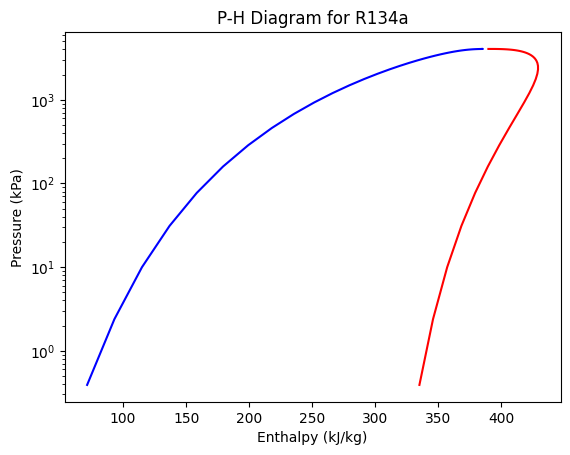

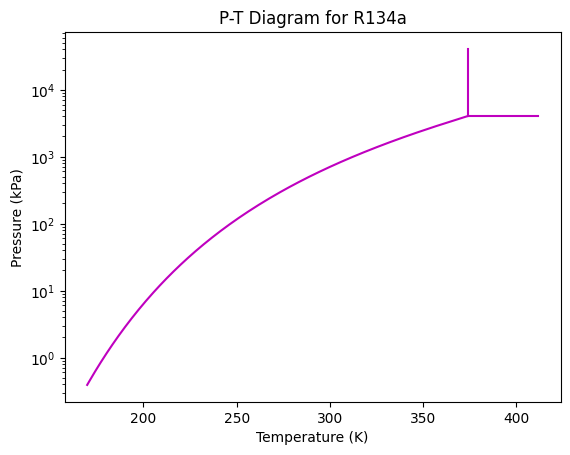

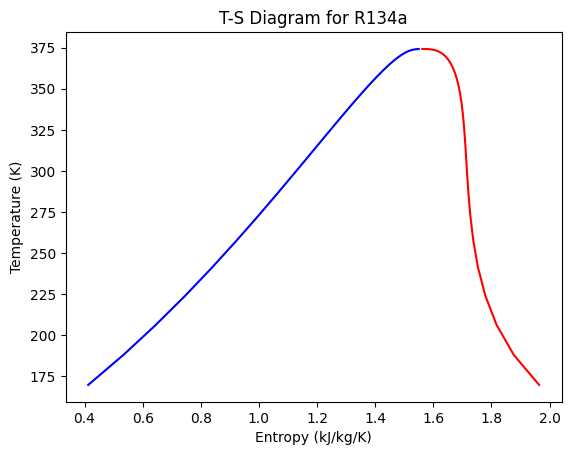

In [3]:
vc.draw_thermodynamic_diagrams()

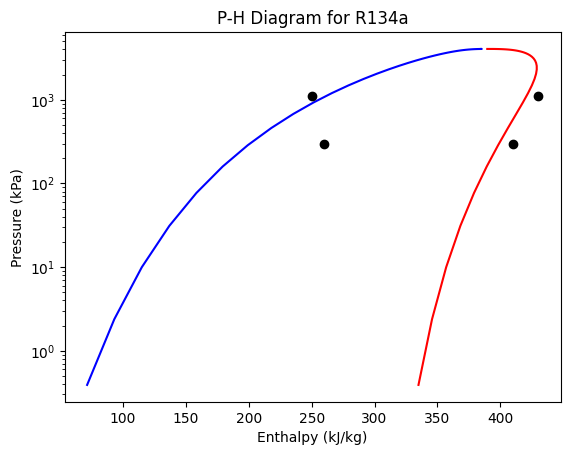

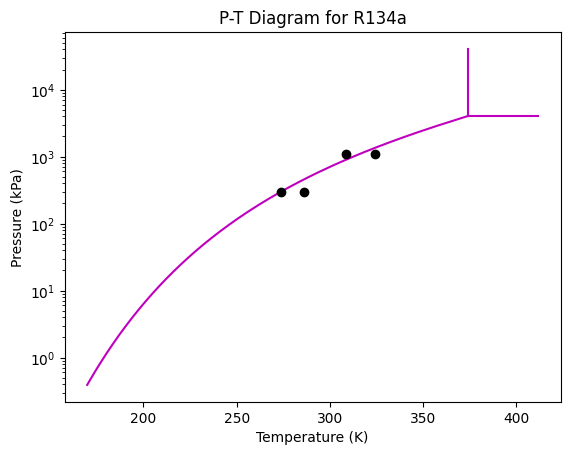

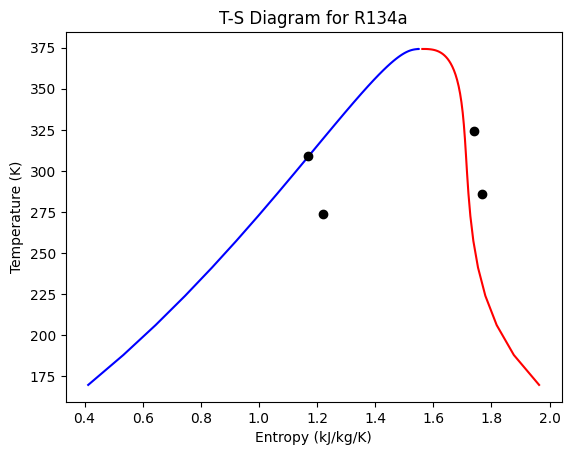

In [4]:
vc.specify_initial_conditions(enthalpy=[410,430,250,260], # kJ/kg
                                pressure=[300,1100,1100,300] # kPa
                                )

## Initialize

In [5]:
vc.initialize()

### Optimize

In [6]:
vc.set_specifications(
    low_side_pressure=(200, 300), # Pa
    high_side_pressure=(1000, 2000), # Pa
    evaporator_temperature=(-20, 10), # degC
    condenser_temperature=(30, 40), # degC
)

vc.optimize_COP(verbose=False)

2025-03-09 19:26:23 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.evaporator.control_volume.heat


2025-03-09 19:26:23 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-03-09 19:26:23 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-03-09 19:26:23 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Initialization failed


5.348191487553221

Optimized COP: 5.348


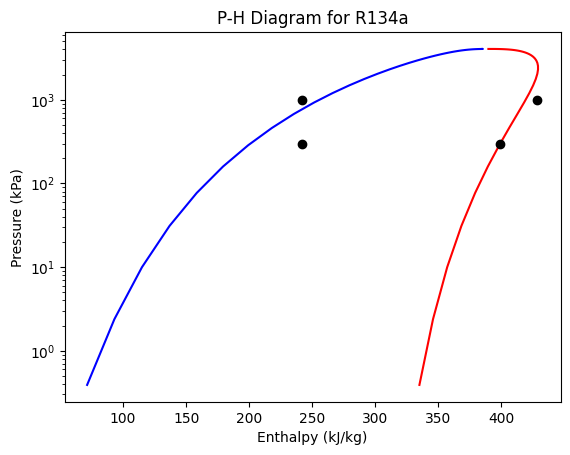

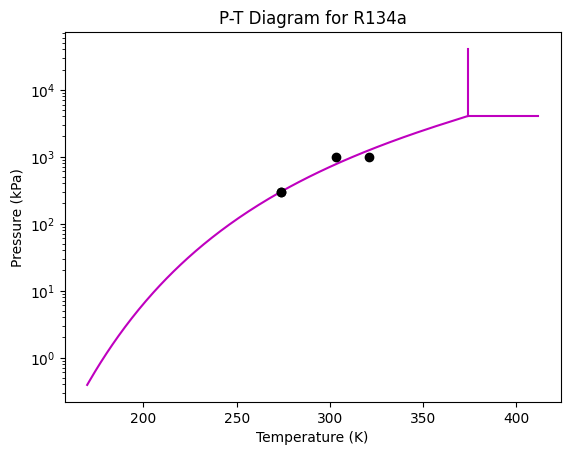

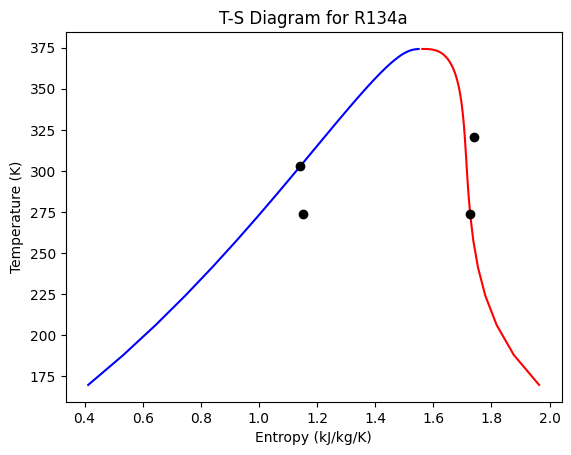


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.5728e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.82     273.82
    P                          pascal 2.9996e+05 2.9996e+05
    Vapor Fraction      dimensionless    0.20605     1.0000
    Mass Enthalpy    joule / kilogram 2.4172e+05 3.9899e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

In [7]:
vc.report_solution()

## Sensitivity Analysis

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Initialization failed
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Initialization failed
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Initialization failed
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization faile

Text(0, 0.5, 'COP')

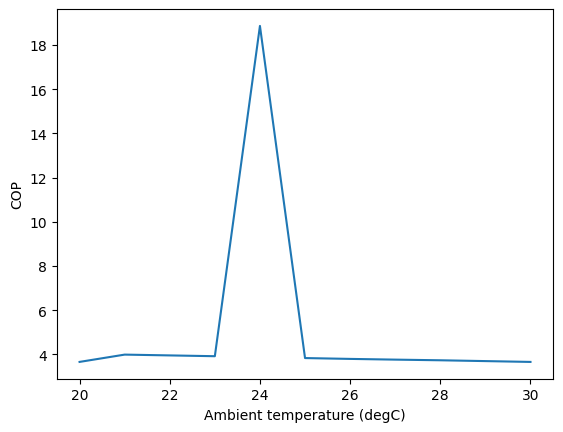

In [ ]:
import numpy as np
T_ambient = np.linspace(20, 30, 11)

COP = np.zeros_like(T_ambient)

for i, Ta in enumerate(T_ambient):
    vc.set_specifications(
        low_side_pressure=(200, 300), # Pa
        high_side_pressure=(1000, 2000), # Pa
        evaporator_temperature=(-30, -10), # degC
        condenser_temperature=(Ta+5, Ta+15), # degC
    )
    COP[i] = vc.optimize_COP(verbose=False)

import matplotlib.pyplot as plt
plt.plot(T_ambient, COP)
plt.xlabel('Ambient temperature (degC)')
plt.ylabel('COP')
plt.show()